# Algorithmic Trading with Machine Learning


Algorithmic trading is based on computer programs that follow a defined set of instructions to execute trades. One of several big advantages is the reduction of mistakes by human traders due to emotional and psychological reactions. Furthermore, automated systems are able to generate profits at a speed and frequency that is impossible for a human traders. In the following we focus on a simple trading strategy based on neural networks, whereas other Machine Learning techniques can be implemented. Moreover, more complex neural networks architectures might be considered to reach higher accuracy. The ultimate goal is to predict future movements of stock prices, with high accuracy.

# Import and Prepare Data

For this particular use case we need the following packages: 

In [62]:
import numpy as np
import pandas as pd
import talib as tb
import matplotlib.pyplot as plt
import seaborn as sns

Any trading strategy is based on input data and all informations provided should help to build up the algorithms; the input data set is vital for your trading strategy. This use case is limited to one stock, but one might extend the strategy to a richer portfolio. As input we only focus on the history of a stock price and by doing so we work with tools belonging to the technical analysis. The input data can be enriched in order to give more informations to be used for modelling.

In [63]:
df = pd.read_csv('clean_model_normalized_2.csv')


X = df.iloc[:,0:-1]
y = df.iloc[:,-1] #[-1]]

print(X.head())


   From_Grade  To_Grade      Days  Cancelled_Pax  Total_Discount_Pax  \
0   -1.254533 -1.047299  1.870216      -0.068258           -0.319806   
1    0.898241  0.504822  1.078884      -0.068258           -0.632037   
2    1.436435  1.022195 -0.187248       0.338857            0.616888   
3    0.360048 -0.012552 -0.503781      -0.475373           -0.319806   
4   -0.178146 -0.012552  0.445818      -0.271816            0.304656   

        FPP  Total_Pax  FPP_to_School_enrollment   Tuition  FRP_Active  ...  \
0 -0.026362   0.119278                 -0.137219  0.865920   -0.510634  ...   
1 -0.728624  -0.673209                 -0.749358  0.084356   -0.454741  ...   
2  0.739742   0.412792                  0.092647  0.062206    0.942584  ...   
3 -0.345572  -0.379695                 -0.101668 -0.236813   -0.175276  ...   
4  0.037480  -0.027479                 -0.357690  0.933951    0.048296  ...   

   Is_MDR_Low_Grade_5  Is_MDR_Low_Grade_6  Is_MDR_Low_Grade_7  \
0                   0      

In [37]:
#select top features to explain 'retained' field target
from sklearn.feature_selection import SelectKBest
fs = SelectKBest(k= 2)
#fs.fit(x_train, y_train)
#fs.fit(X, y)
Xnew=SelectKBest(k= 2).fit_transform(X,y)
#df_fs = pd.DataFrame(data = fs.scores_,  columns=["SCORES"])
#df_fs['Features'] = x_train.columns
#df_fs['Features'] = X.columns
#print(df_fs.sort_values(ascending=False, by=['SCORES'])[0:50])

#print(X)
#select top features to explain 'retained' field target
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

X_new = SelectKBest( f_classif,k=2).fit_transform(X, y)
#X_new.shape
#print(X_New)

C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [56 94] are constant.
  UserWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [56 94] are constant.
  UserWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


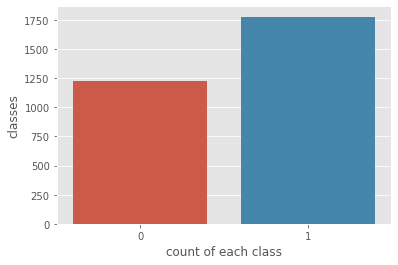

In [8]:
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [46]:


from sklearn.model_selection import train_test_split



#Split data into train and test set
seed=10032021
for x in range(0, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size =0.3, #75% train, 25% test
                                                    shuffle=True,
                                                    stratify=y,#None,
                                                    random_state= seed) #fix random seed to reproduce
    print(seed)
seed=10032021
for x in range(0, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size =0.3, #75% train, 25% test
                                                    shuffle=True,
                                                    stratify=y,#None,
                                                    random_state= seed) #fix random seed to reproduce
    print(seed)

10032021
10032021


Let us visualize our data set in order to get a first impression. Based on these informations simple trading strategies can be applied. 

{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
10032021
Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    7.0s finished
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


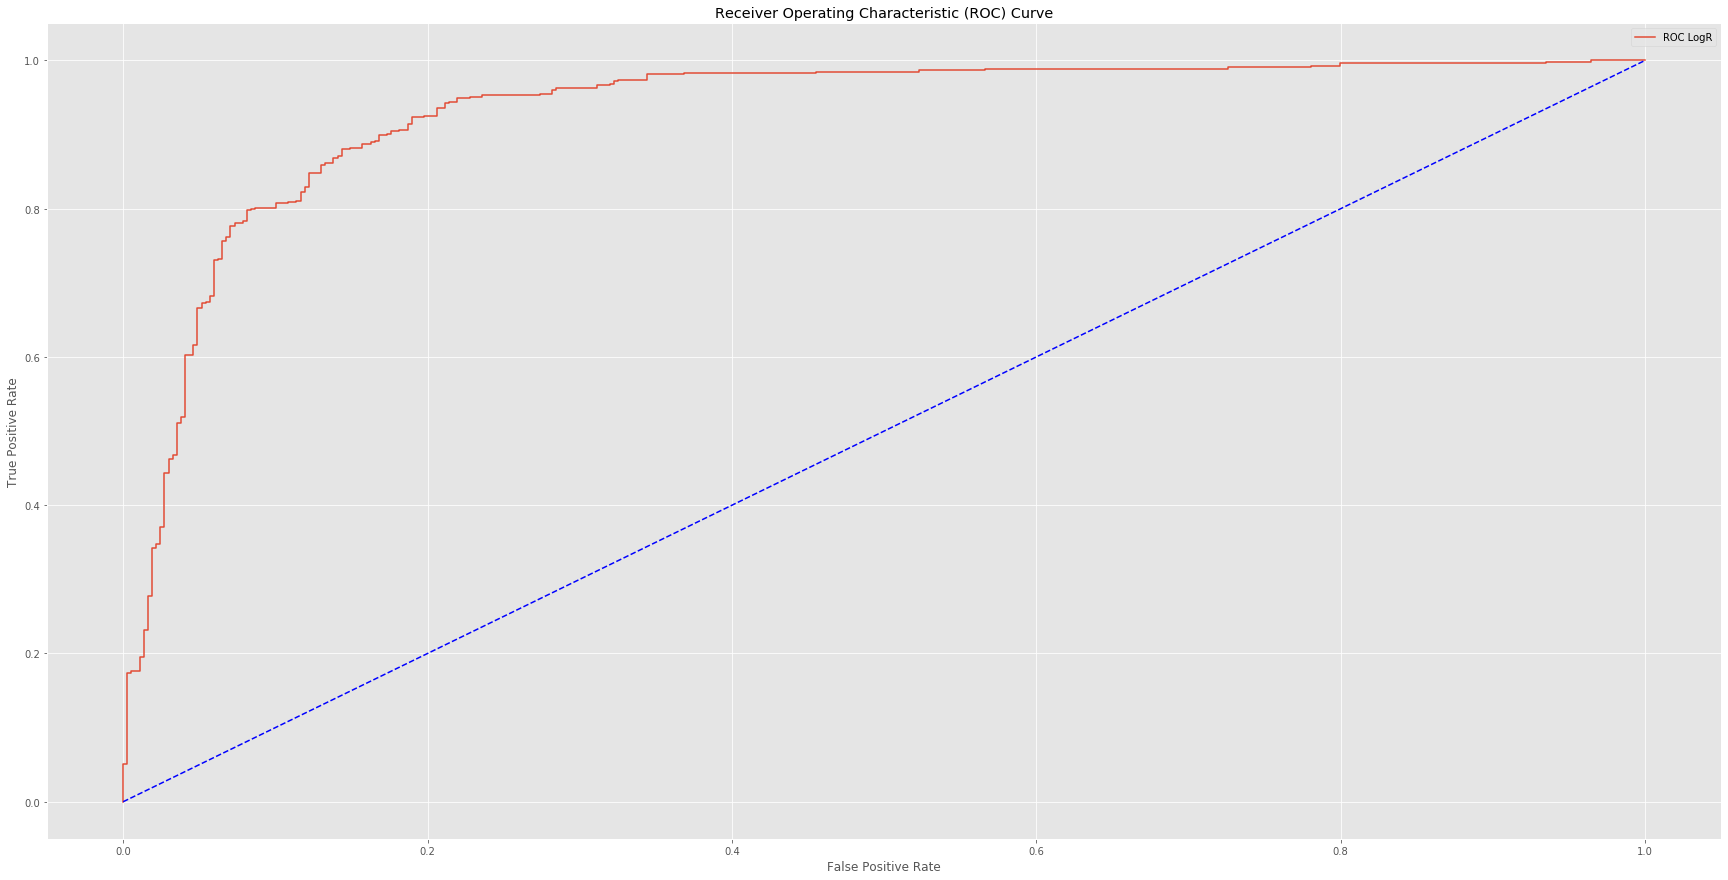

AUCLogR: 0.93


In [84]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, xgboost 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, train_test_split

import matplotlib.pyplot as plt

classifierLogR = LogisticRegression()
parametersLogR = {"C":[1e-4,1e-3,1e-2,1e-1,1,10],"penalty":['l2'], "solver": ['newton-cg', 'lbfgs', 'sag', 'saga'] }

print(parametersLogR)

#Split data into train and test set
seed=10032021
#AUC = np.array() 
for x in range(0, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size =0.3, #75% train, 25% test
                                                    shuffle=True,
                                                    stratify=y,#None,
                                                    random_state= seed) #fix random seed to reproduce
    print(seed)
    seed=seed+10000 
  
   

       
    gsLogR = GridSearchCV(classifierLogR, parametersLogR, cv=3, scoring = 'f1', verbose=1, n_jobs=-1, refit=True)
    gsLogR = gsLogR.fit(X_train, y_train)
    best_modelLogR = gsLogR.best_estimator_
    y_predLogR = best_modelLogR.predict(X_test)
    y_probsLogR = best_modelLogR.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
    fprLogR, tprLogR, thresholdsLogR=metrics.roc_curve(y_test,  y_probsLogR[:,1])
      
  
    
    plt.figure(figsize=(30,15))
    plt.ion()
  
    plt.plot(fprLogR,tprLogR,label='ROC LogR')
 
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


    aucLogR = metrics.roc_auc_score(y_test, y_probsLogR[:,1])
 
    print('AUCLogR: %.2f' % aucLogR)
   
    

In [125]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,xgboost
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, train_test_split

import matplotlib.pyplot as plt

classifierSVC = SVC(probability=True)
parametersSVC = {"kernel":['linear'], "C":[0.1],"gamma":[1], "degree":[2]}
#parametersSVC = {"kernel":['linear','rbf','poly'], "C":[0.1,10,100],"gamma":[1,0.1,0.01], "degree":[2,3,4]}

#Split data into train and test set
seed=10032021
#AUC = np.array() 
for x in range(0, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size =0.3, #75% train, 25% test
                                                    shuffle=True,
                                                    stratify=y,#None,
                                                    random_state= seed) #fix random seed to reproduce
        
 #   classifierSVC=svm.SVC(probability=True)
    gsSVC = GridSearchCV(classifierSVC, parametersSVC, cv=3, scoring = 'f1', verbose=1, n_jobs=-1, refit=True)
    gsSVC = gsSVC.fit(X_train, y_train)
    print('***GRIDSEARCH RESULTS***')

    print("Best score: %f using %s" % (gsSVC.best_score_, gsSVC.best_params_))
    means = gsSVC.cv_results_['mean_test_score']
    stds = gsSVC.cv_results_['std_test_score']
    params = gsSVC.cv_results_['params']

    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
        
    best_modelSVC = gsSVC.best_estimator_
    y_predSVC = best_modelSVC.predict(X_test)
   # best_modelSVC(probability=True)
    y_probsSVC = best_modelSVC.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
    fprSVC, tprSVC, thresholdsSVC=metrics.roc_curve(y_test,  y_probsSVC[:,1])
   
    
    plt.figure(figsize=(30,15))
    plt.plot(fprSVC,tprSVC,label='ROC SVC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
    



ImportError: cannot import name 'xgboost' from 'sklearn.ensemble' (C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\ensemble\__init__.py)

In [129]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, train_test_split

import matplotlib.pyplot as plt

classifierMLP = MLPClassifier()
parametersMLP = {'hidden_layer_sizes':[(5),(5,5,5,5,5),(100,100),(200,100),(100, 70,50),(150,150,150)],
              'activation': ['relu'],#,'tanh', 'relu', 'logistic'],
              'solver': ['sgd'],#, 'adam'],
              'max_iter': [300], 
              'batch_size': [200,1000],
             # 'early_stopping':True,
              'alpha': [0.00001,0.1,0.2],
              'learning_rate': ['constant','adaptive']}

classifierDT = DecisionTreeClassifier()
parametersDT = {'criterion': ['entropy','gini'], 
              'max_depth': [3],#,4,5,100],
              'min_samples_split': [5,10,3],
              'min_samples_leaf': [2,1]}

classifierGB = GradientBoostingClassifier()
parametersGB = {'loss': ['deviance','exponential'], 
              'learning_rate': [0.1,0.2,0.3],
              #'n_estimators': [20,50,100,300],
              'subsample': [1.0,0.8],
               #'criterion':['friedman_mse', 'mse', 'mae'],
               'min_samples_split': [5,100,200],
               'min_samples_leaf': [2,4,10]
             }

classifierXGB = XGBClassifier()
parametersXGB = {'loss': ['deviance','exponential'], 
              'learning_rate': [0.1,0.2,0.3],
              #'n_estimators': [20,50,100,300],
              'subsample': [1.0,0.8],
               #'criterion':['friedman_mse', 'mse', 'mae'],
               'min_samples_split': [5,100,200],
               'min_samples_leaf': [2,4,10]
             }
        
classifierKN = KNeighborsClassifier()
parametersKN = {'n_neighbors':np.arange(1,40)}

classifierSVC = SVC(probability=True)
parametersSVC = {"kernel":['linear','rbf','poly'], "C":[0.1,10,100],"gamma":[1,0.1,0.01], "degree":[2,3,4]}

classifierLogR = LogisticRegression()
parametersLogR = {"C":[1e-4,1e-3,1e-2,1e-1,1,10],"penalty":['l2'], "solver": ['newton-cg', 'lbfgs', 'sag', 'saga'] }

print(parametersLogR)

#Split data into train and test set
seed=10032021
#AUC = np.array() 
for x in range(0, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size =0.3, #75% train, 25% test
                                                    shuffle=True,
                                                    stratify=y,#None,
                                                    random_state= seed) #fix random seed to reproduce
    print(seed)
    seed=seed+10000 
    
    gsXGB = GridSearchCV(classifierXGB, parametersMLP, cv=3, scoring = 'f1', verbose=1, n_jobs=-1, refit=True)
    gsXGB = gsXGB.fit(X_train, y_train)
    best_modelXGB = gsMLP.best_estimator_
    y_predXGB = best_modelXGB.predict(X_test)
    y_probsXGB = best_modelXGB.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
    fprXGB, tprXGB, thresholdsXGB=metrics.roc_curve(y_test,  y_probsXGB[:,1])
    
    gsMLP = GridSearchCV(classifierMLP, parametersMLP, cv=3, scoring = 'f1', verbose=1, n_jobs=-1, refit=True)
    gsMLP = gsMLP.fit(X_train, y_train)
    best_modelMLP = gsMLP.best_estimator_
    y_predMLP = best_modelMLP.predict(X_test)
    y_probsMLP = best_modelMLP.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
    fprMLP, tprMLP, thresholdsMLP=metrics.roc_curve(y_test,  y_probsMLP[:,1])
   
    gsDT = GridSearchCV(classifierDT, parametersDT, cv=3, scoring = 'f1', verbose=1, n_jobs=-1, refit=True)
    gsDT = gsDT.fit(X_train, y_train)
    best_modelDT = gsDT.best_estimator_
    y_predDT = best_modelDT.predict(X_test)
    y_probsDT = best_modelDT.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
    fprDT, tprDT, thresholdsDT=metrics.roc_curve(y_test,  y_probsDT[:,1])
    
    gsGB = GridSearchCV(classifierGB, parametersGB, cv=3, scoring = 'f1', verbose=1, n_jobs=-1, refit=True)
    gsGB = gsGB.fit(X_train, y_train)
    best_modelGB = gsGB.best_estimator_
    y_predGB = best_modelGB.predict(X_test)
    y_probsGB = best_modelGB.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
    fprGB, tprGB, thresholdsGB=metrics.roc_curve(y_test,  y_probsGB[:,1])
    
    gsXGB = GridSearchCV(classifierXGB, parametersXGB, cv=3, scoring = 'f1', verbose=1, n_jobs=-1, refit=True)
    gsXGB = gsXGB.fit(X_train, y_train)
    best_modelXGB = gsXGB.best_estimator_
    y_predXGB = best_modelXGB.predict(X_test)
    y_probsXGB = best_modelXGB.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
    fprXGB, tprXGB, thresholdsXGB=metrics.roc_curve(y_test,  y_probsXGB[:,1])
   
    gsSVC = GridSearchCV(classifierSVC, parametersSVC, cv=3, scoring = 'f1', verbose=1, n_jobs=-1, refit=True)
    gsSVC = gsSVC.fit(X_train, y_train)
    best_modelSVC = gsSVC.best_estimator_
    y_predSVC = best_modelSVC.predict(X_test)
    y_probsSVC = best_modelSVC.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
    fprSVC, tprSVC, thresholdsSVC=metrics.roc_curve(y_test,  y_probsSVC[:,1])
       
    gsLogR = GridSearchCV(classifierLogR, parametersLogR, cv=3, scoring = 'f1', verbose=1, n_jobs=-1, refit=True)
    gsLogR = gsLogR.fit(X_train, y_train)
    best_modelLogR = gsLogR.best_estimator_
    y_predLogR = best_modelLogR.predict(X_test)
    y_probsLogR = best_modelLogR.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
    fprLogR, tprLogR, thresholdsLogR=metrics.roc_curve(y_test,  y_probsLogR[:,1])
      
    gsKN = GridSearchCV(classifierKN, parametersKN, cv=3, scoring = 'f1', verbose=1, n_jobs=-1, refit=True)
    gsKN = gsKN.fit(X_train, y_train)
    best_modelKN = gsKN.best_estimator_
    y_predKN = best_modelKN.predict(X_test)
    y_probsKN = best_modelKN.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
    fprKN, tprKN, thresholdsKN=metrics.roc_curve(y_test,  y_probsKN[:,1])
    
    modelNB = GaussianNB()
    modelNB.fit(X_train, y_train)
    y_predNB=modelNB.predict(X_test)
    y_probsNB = modelNB.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
    fprNB, tprNB, thresholdsNB=metrics.roc_curve(y_test,  y_probsNB[:,1])
    
    plt.figure(figsize=(30,15))
    plt.ion()
    plt.plot(fprMLP, tprMLP, label='ROC MLP')
    plt.plot(fprDT,tprDT,label='ROC DT')
    plt.plot(fprGB,tprGB,label='ROC GB')
    plt.plot(fprSVC,tprSVC,label='ROC SVC')
    plt.plot(fprLogR,tprLogR,label='ROC LogR')
    plt.plot(fprKN,tprKN,label='ROC KN')
    plt.plot(fprNB,tprNB,label='ROC NB')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    aucMLP = metrics.roc_auc_score(y_test, y_probsMLP[:,1])
    aucDT = metrics.roc_auc_score(y_test, y_probsDT[:,1])
    aucGB = metrics.roc_auc_score(y_test, y_probsGB[:,1])
    aucSVC = metrics.roc_auc_score(y_test, y_probsSVC[:,1])
    aucLogR = metrics.roc_auc_score(y_test, y_probsLogR[:,1])
    aucKN = metrics.roc_auc_score(y_test, y_probsKN[:,1])
    aucNB = metrics.roc_auc_score(y_test, y_probsNB[:,1])
    print('AUC MLP: %.2f' % aucMLP)
    print('AUC DT: %.2f' % aucDT)
    print('AUCGB: %.2f' % aucGB)
    print('AUCSVC: %.2f' % aucSVC)
    print('AUCLogR: %.2f' % aucLogR)
    print('AUCKN: %.2f' % aucKN)
    print('AUCNB: %.2f' % aucNB)
    

{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
10032021
Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


XGBoostError: Invalid Parameter format for learning_rate expect float but value='constant'

In [120]:
print(gsMLP.best_params_)
print(gsDT.best_params_)
print(gsGB.best_params_)
print(gsXGB.best_params_)
print(gsSVC.best_params_)
print(gsKN.best_params_)
print(gsLogR.best_params_)

{'activation': 'relu', 'alpha': 0.1, 'batch_size': 200, 'hidden_layer_sizes': (150, 150, 150), 'learning_rate': 'constant', 'max_iter': 300, 'solver': 'sgd'}
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}
{'learning_rate': 0.2, 'loss': 'deviance', 'min_samples_leaf': 10, 'min_samples_split': 100, 'subsample': 1.0}
{'C': 100, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}
{'n_neighbors': 1}
{'C': 10, 'penalty': 'l2', 'solver': 'sag'}


10032021


C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


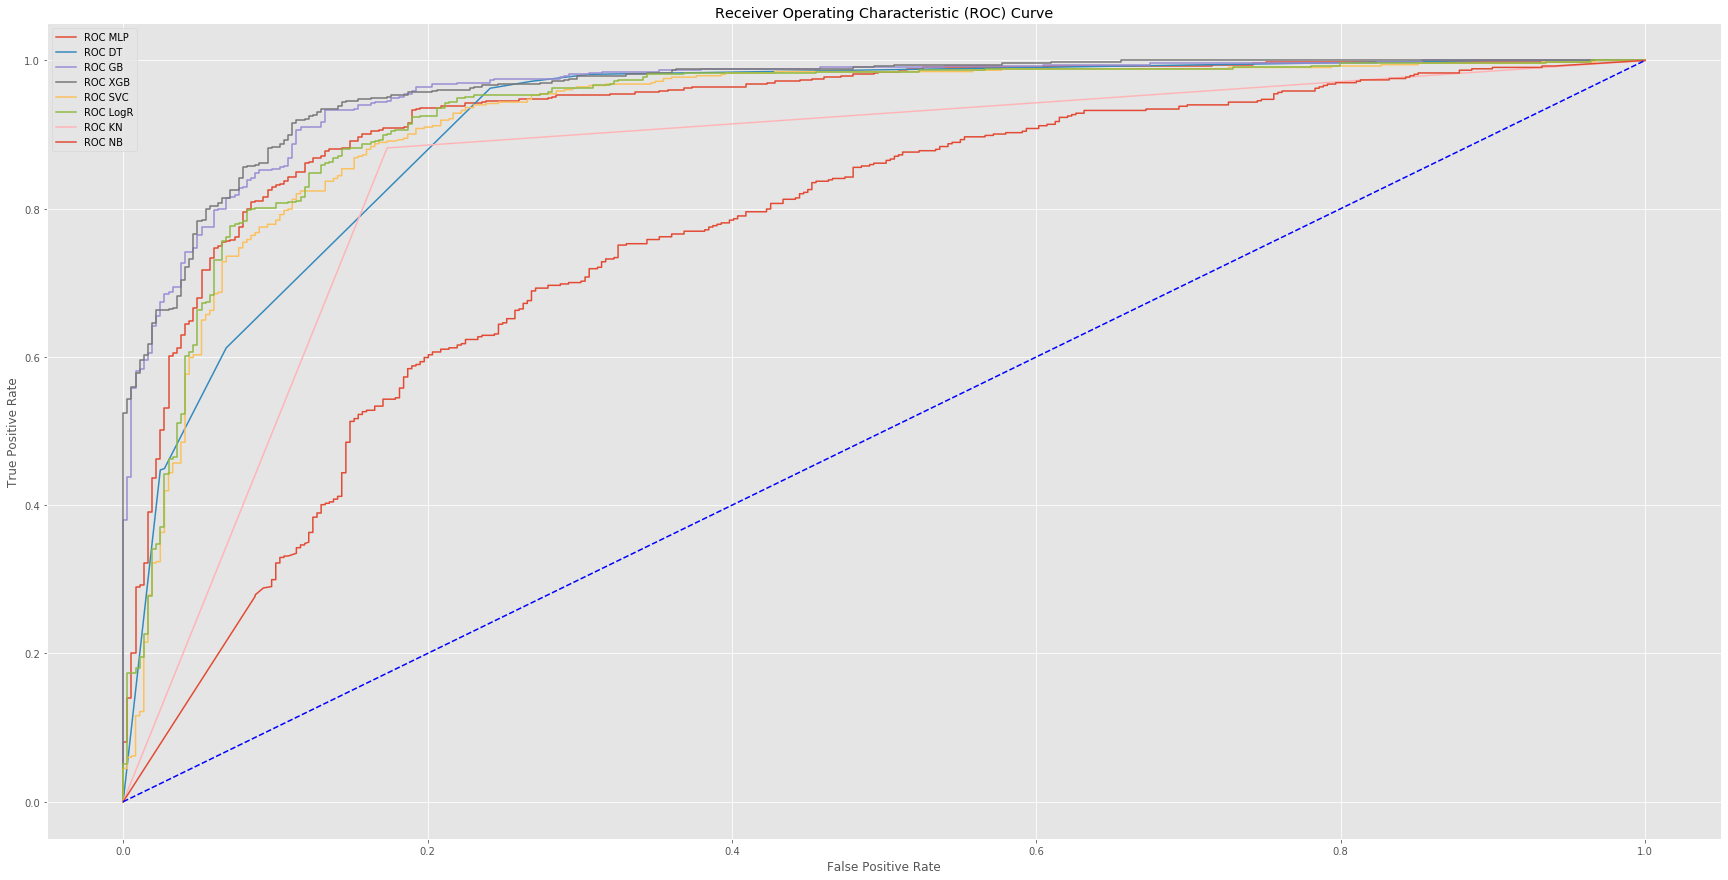

AUC MLP: 0.94
AUC DT: 0.92
AUCGB: 0.96
AUCXGB: 0.96
AUCSVC: 0.92
AUCLogR: 0.93
AUCKN: 0.85
AUCNB: 0.76


ValueError: 8 columns passed, passed data had 7 columns

In [130]:


#Split data into train and test set
seed=10032021
#AUC = np.array() 

AUC=[[]]

for x in range(0, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size =0.3, #75% train, 25% test
                                                    shuffle=True,
                                                    stratify=y,#None,
                                                    random_state= seed) #fix random seed to reproduce
    print(seed)
    seed=seed+10000 
    
 
        
    modelMLP = MLPClassifier(hidden_layer_sizes=(150, 150,150),activation='relu',batch_size=200,learning_rate='constant', alpha=0.1, max_iter=300, solver='sgd')
    modelDT = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=2,min_samples_split=10)
    modelGB = GradientBoostingClassifier(learning_rate= 0.2, loss= 'deviance', min_samples_leaf=10, min_samples_split=100, subsample=1.0)
    modelXGB= XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
    modelSVC=SVC(C=100,degree=2, gamma=1, kernel='linear',probability=True)
    modelKN = KNeighborsClassifier(n_neighbors=1)
    modelLogR = LogisticRegression(C=10, penalty='l2',solver='sag')
    modelNB = GaussianNB()
    
    modelMLP.fit(X_train,y_train)
    modelDT.fit(X_train,y_train)
    modelGB.fit(X_train,y_train)
    modelXGB.fit(X_train,y_train)
    modelSVC.fit(X_train,y_train)
    modelKN.fit(X_train,y_train)
    modelLogR.fit(X_train,y_train)
    modelNB.fit(X_train, y_train)
  
    y_predMLP = modelMLP.predict(X_test)
    y_probsMLP = modelMLP.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
    fprMLP, tprMLP, thresholdsMLP=metrics.roc_curve(y_test,  y_probsMLP[:,1])
   
    y_predDT = modelDT.predict(X_test)
    y_probsDT = modelDT.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
    fprDT, tprDT, thresholdsDT=metrics.roc_curve(y_test,  y_probsDT[:,1])
    
    y_predGB = modelGB.predict(X_test)
    y_probsGB = modelGB.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
    fprGB, tprGB, thresholdsGB=metrics.roc_curve(y_test,  y_probsGB[:,1])
    
    y_predXGB = modelXGB.predict(X_test)
    y_probsXGB = modelXGB.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
    fprXGB, tprXGB, thresholdsXGB=metrics.roc_curve(y_test,  y_probsXGB[:,1])
    
    y_predSVC = modelSVC.predict(X_test)
    y_probsSVC = modelSVC.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
    fprSVC, tprSVC, thresholdsSVC=metrics.roc_curve(y_test,  y_probsSVC[:,1])
    
    y_predKN = modelKN.predict(X_test)
    y_probsKN = modelKN.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
    fprKN, tprKN, thresholdsKN=metrics.roc_curve(y_test,  y_probsKN[:,1])
    
    y_predLogR = modelLogR.predict(X_test)
    y_probsLogR = modelLogR.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
    fprLogR, tprLogR, thresholdsLogR=metrics.roc_curve(y_test,  y_probsLogR[:,1])
    
    y_predNB = modelNB.predict(X_test)
    y_probsNB = modelNB.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 
    fprNB, tprNB, thresholdsNB=metrics.roc_curve(y_test,  y_probsNB[:,1])
    
    plt.figure(figsize=(30,15))
    plt.ion()
    plt.plot(fprMLP, tprMLP, label='ROC MLP')
    plt.plot(fprDT,tprDT,label='ROC DT')
    plt.plot(fprGB,tprGB,label='ROC GB')
    plt.plot(fprXGB,tprXGB,label='ROC XGB')
    plt.plot(fprSVC,tprSVC,label='ROC SVC')
    plt.plot(fprLogR,tprLogR,label='ROC LogR')
    plt.plot(fprKN,tprKN,label='ROC KN')
    plt.plot(fprNB,tprNB,label='ROC NB')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    aucMLP = metrics.roc_auc_score(y_test, y_probsMLP[:,1])
    aucDT = metrics.roc_auc_score(y_test, y_probsDT[:,1])
    aucGB = metrics.roc_auc_score(y_test, y_probsGB[:,1])
    aucXGB = metrics.roc_auc_score(y_test, y_probsXGB[:,1])
    aucSVC = metrics.roc_auc_score(y_test, y_probsSVC[:,1])
    aucLogR = metrics.roc_auc_score(y_test, y_probsLogR[:,1])
    aucKN = metrics.roc_auc_score(y_test, y_probsKN[:,1])
    aucNB = metrics.roc_auc_score(y_test, y_probsNB[:,1])
    print('AUC MLP: %.2f' % aucMLP)
    print('AUC DT: %.2f' % aucDT)
    print('AUCGB: %.2f' % aucGB)
    print('AUCXGB: %.2f' % aucXGB)
    print('AUCSVC: %.2f' % aucSVC)
    print('AUCLogR: %.2f' % aucLogR)
    print('AUCKN: %.2f' % aucKN)
    print('AUCNB: %.2f' % aucNB)
    
    AUC.append([aucMLP,aucDT,aucGB,aucSVC,aucLogR,aucKN,aucNB])

df=pd.DataFrame(AUC, columns=['aucMLP','aucDT','aucGB','aucXGB','aucSVC','aucLogR','aucKN','aucNB'])
boxplot=df.boxplot(column=['aucMLP','aucDT','aucGB','aucXGB','aucSVC','aucLogR','aucKN','aucNB'])
    

In [ ]:
print('*Gridsearch results*')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
    best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import f1_score
print('*Results on Test Set*')
print("f1_score: ", f1_score(y_test, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

A vital step for generating neural networks is to set the hyperparameters. One should test several combinations in order to see which combinations are efficient, in particular for the underlying data and problem. The architecture and optimization algorithm need to be optimized. You have a lot of freedom in the choice and in general there is not a golden rule for the best hyperparameters. The best strategy is just to calculate a huge number of parameter combinations. 

In [13]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {'hidden_layer_sizes':[(5, 5),(5,5,5,5,5),(100,100)],#,(200,100),(100, 70,50),(150,150,150)],
              'activation': ['relu'],#,'tanh', 'relu', 'logistic'],
              'solver': ['sgd', 'adam'],
              'max_iter': [300], 
              'batch_size': [200,1000],
             # 'early_stopping':True,
              'alpha': [0.00001,0.1,0.2],
              'learning_rate': ['constant','adaptive']}


GridSearchCV provides a stratified k folds cross validation and a “fit” and a “score” method is implemented. It performs a comprehensive search over given parameter values for an estimator. The number of folds and scoring can be specified a-priori. If "refit=True" is selected, the model is re-trained on the whole training set based on the best parameters.

In [16]:
#DEFINE YOUR GRIDSEARCH 

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1, refit=True)

#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)

print('*Gridsearch results*')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
    best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import f1_score
print('*Results on Test Set*')
print("f1_score: ", f1_score(y_test, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 131 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Paralle

The hyperparameter tuning phase should give the best choice for the underlying problem. With that set of parameters the final model can be generated. 

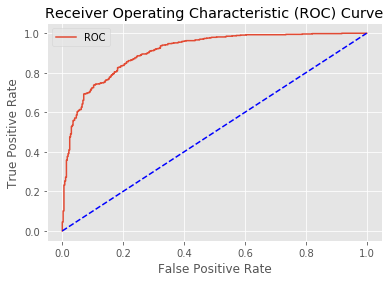

AUC: 0.91


In [18]:
from sklearn import metrics

#model=MLPClassifier(activation='relu',
 #                   hidden_layer_sizes=(100,70,50), 
  #                  alpha=1e-05,
   #                 learning_rate='adaptive',
    #                solver='adam',
     #               max_iter=300)

#model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

y_probs = best_model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
#
auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

Based on the final model we can go live with our algorithm. To get another idea of the performance let us see which signals the method gives. 

In [19]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.tree import DecisionTreeClassifier
import numpy as np

classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [3,4,5,100],
              'min_samples_split': [5,10,3],
              'min_samples_leaf': [2,1]}
#DEFINE YOUR GRIDSEARCH 
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    #TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn import metrics
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1894s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1648s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  75 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1693s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  99 out of 144 | elapsed:    0.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    0.9s finished


***GRIDSEARCH RESULTS***
Best score: 0.858194 using {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.850439 (0.011897) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.850439 (0.011897) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.850439 (0.011897) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.850439 (0.011897) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.850439 (0.011897) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.850439 (0.011897) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}
0.856136 (0.007209) with: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.856136 (0.007209) with: {'criterion': 'entropy', 'max_depth'

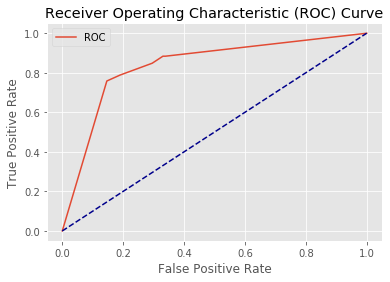

AUC: 0.84


In [20]:
from sklearn import metrics
model = DecisionTreeClassifier(criterion='gini', max_depth=100, min_samples_leaf=2, min_samples_split=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

In [27]:
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf','polinomial'], "C":[0.1,100],"gamma":[1], "degree":[2,3,4]}

#DEFINE YOUR GRIDSEARCH 
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'accuracy', verbose=50, n_jobs=-1, refit=True)



In [28]:
gs = gs.fit(X_train, y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0858s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  19 out of  54 | elapsed:    2.1s remaining:    4.0s
[Parallel(n_jobs=

ValueError: 'polinomial' is not in list

In [ ]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn.metrics import f1_score
print('***RESULTS ON TEST SET***')
print("f1_score: ", f1_score(y_test, y_pred))

from sklearn import metrics

model = SVC(C=0.1, gamma=0.0001, kernel='linear',probability=True)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)